In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reddit-vaccine-myths/reddit_vm.csv


In [2]:
posts = pd.read_csv('/kaggle/input/reddit-vaccine-myths/reddit_vm.csv')

In [3]:
posts.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


Let us first have a broad look over the data...

In [4]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1602 non-null   object 
 1   score      1602 non-null   int64  
 2   id         1602 non-null   object 
 3   url        469 non-null    object 
 4   comms_num  1602 non-null   int64  
 5   created    1602 non-null   float64
 6   body       1226 non-null   object 
 7   timestamp  1602 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 100.2+ KB


In [5]:
posts.describe()

,score,comms_num,created
count,1602.000000,1602.000000,1.602000e+03
mean,3.686642,1.838951,1.547197e+09
std,29.915671,16.115147,7.099511e+07
min,-12.000000,0.000000,1.389595e+09
25%,1.000000,0.000000,1.554367e+09
50%,1.000000,0.000000,1.569226e+09
75%,3.000000,1.000000,1.584901e+09
max,1187.000000,595.000000,1.640822e+09


array([[<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'comms_num'}>],
       [<AxesSubplot:title={'center':'created'}>, <AxesSubplot:>]],
      dtype=object)

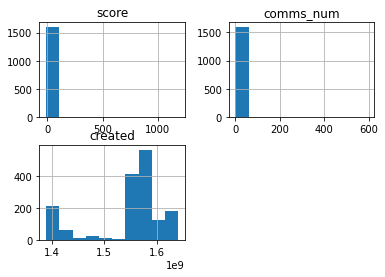

In [6]:
posts.hist()

In [7]:
posts['created']

0       1.614400e+09
1       1.614316e+09
2       1.613887e+09
3       1.613796e+09
4       1.613468e+09
            ...     
1597    1.556223e+09
1598    1.556223e+09
1599    1.556222e+09
1600    1.556221e+09
1601    1.556220e+09
Name: created, Length: 1602, dtype: float64

In [8]:
print('Number of posts: {}'.format(1602 - posts.title.value_counts()['Comment']), ', Number of comments: {}'.format(posts.title.value_counts()['Comment']))

Number of posts: 469 , Number of comments: 1133


Recall that we had 1133 null values for url. From the above, these must be for the comments. Let us investigate the score column...

In [9]:
posts.score.value_counts()

 1       666
 2       235
 0       135
 3       126
 5        70
 4        67
 6        60
 7        32
-1        24
 9        21
 8        20
 10       16
 11       16
 15       11
 12       11
-2        11
 13       10
 16        9
-3         7
 14        7
 17        7
-5         5
 21        5
 20        4
-4         4
 23        3
 22        2
 28        2
-6         2
 19        2
 32        2
 26        2
 24        1
 45        1
 1187      1
 30        1
 27        1
 38        1
-12        1
-10        1
Name: score, dtype: int64

In [10]:
import matplotlib.pyplot as plt

In [11]:
posts.score.value_counts().index

Int64Index([   1,    2,    0,    3,    5,    4,    6,    7,   -1,    9,    8,
              10,   11,   15,   12,   -2,   13,   16,   -3,   14,   17,   -5,
              21,   20,   -4,   23,   22,   28,   -6,   19,   32,   26,   24,
              45, 1187,   30,   27,   38,  -12,  -10],
           dtype='int64')

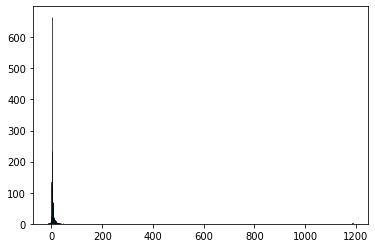

In [12]:
fig, ax = plt.subplots()

ax.bar(posts.score.value_counts().index, posts.score.value_counts().values, width=1, edgecolor="black", linewidth=0.7)

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
      # ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [13]:
scores = posts.score.value_counts()
scores_1 = scores.drop(1)
score_vals_1 = scores_1.index
score_freqs_1 = scores_1.values

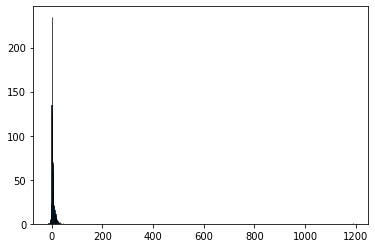

In [14]:
fig, ax = plt.subplots()

ax.bar(score_vals_1, score_freqs_1, width=1, edgecolor="black", linewidth=0.7)


plt.show()

In [15]:
score_vals= scores.index
score_freqs = scores.values

print(score_vals.max(), score_vals.min())

1187 -12


In [16]:
mean_score = sum(score_vals*score_freqs)/sum(score_freqs)
print(mean_score)

3.686641697877653


How does score vary over time? How does it vary over different time scales such as time of day, day of week, year, etc.?

In [17]:
type(posts.timestamp)

pandas.core.series.Series

In [18]:
type(posts.created)

pandas.core.series.Series

In [19]:
score_col = posts.score
created = posts.created

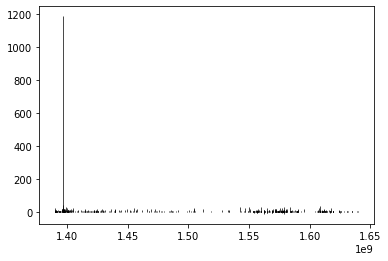

In [20]:
fig, ax = plt.subplots()

ax.bar(created, score_col, width=1, edgecolor="black", linewidth=0.7)


plt.show()

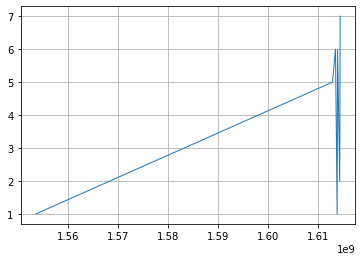

In [21]:
fig, ax = plt.subplots()

ax.plot(created[0:7],score_col[0:7],linewidth=1)

plt.grid(visible=True)

plt.show()

Let's look at averages

In [22]:
scores_10_avg = []
i=0
while i+10<len(posts.id):
    score_sum=0
    for j in range(i, i+10):
        score_sum+=posts.score[j]
    score_avg = score_sum/10
    scores_10_avg.append(score_avg)
    i+=1



In [23]:
scores_10_avg_series = pd.Series(x for x in scores_10_avg)

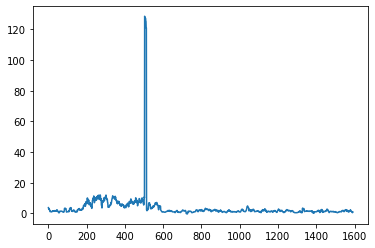

In [24]:
plt.plot(scores_10_avg_series)

After a large spike, seems to remain fairly stable. What could have caused the spike? Perhaps there was a particular disease that was gaining wide public attention at the time and there was a lot of scepticism about it? 

In [25]:
scores_10_avg_series.max()

128.6

In [26]:
scores_10_avg_series[scores_10_avg_series==128.6].index[0]

503

In [27]:
posts.timestamp[503]

'2014-04-04 04:45:57'

Seems like the spike was around early-2014. 

In [28]:
import nltk

In [29]:
text = posts.title

In [30]:
text.values

array(['Health Canada approves AstraZeneca COVID-19 vaccine',
       "COVID-19 in Canada: 'Vaccination passports' a near certainty says bio-ethicist",
       "Coronavirus variants could fuel Canada's third wave", ...,
       'Comment', 'Comment', 'Comment'], dtype=object)

In [31]:
"""If we need to tokenise the post text, we can do so using the following:

#Let's first make all text lower case and remove stopwords:

nltk.download(["stopwords"])

for i in range(0,len(text)):
    text[i]=text.values[i].lower()
    
stopwords = nltk.corpus.stopwords.words("english")

for index, comment in enumerate(text.values):
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
    
text = text.str.replace(r'[^\w\s]+', '')



tokens = []

for i in range(0,len(text)):
    temp_tokens = nltk.word_tokenize(text[i])
    tokens+=temp_tokens

#Now remove duplicates

tokens = list(set(tokens))
tokens.remove('comment')

#print(tokens)
"""

'If we need to tokenise the post text, we can do so using the following:\n\n#Let\'s first make all text lower case and remove stopwords:\n\nnltk.download(["stopwords"])\n\nfor i in range(0,len(text)):\n    text[i]=text.values[i].lower()\n    \nstopwords = nltk.corpus.stopwords.words("english")\n\nfor index, comment in enumerate(text.values):\n    text = text.apply(lambda x: \' \'.join([word for word in x.split() if word not in (stopwords)]))\n    \ntext = text.str.replace(r\'[^\\w\\s]+\', \'\')\n\n\n\ntokens = []\n\nfor i in range(0,len(text)):\n    temp_tokens = nltk.word_tokenize(text[i])\n    tokens+=temp_tokens\n\n#Now remove duplicates\n\ntokens = list(set(tokens))\ntokens.remove(\'comment\')\n\n#print(tokens)\n'

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from statistics import mean

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


We will use NLTKs in-built sentiment analyser. This usually works best on short text inputs, which we do indeed have. If we had longer blocks of text, we could use NLTKs sentence tokeniser to compute the sentiment for each sentence and then average for a given block of text. 

In [33]:
def is_positive(post: str) -> bool:
    """True if the score is positive."""
    score = sia.polarity_scores(post)["compound"]
    return score > 0

In [34]:
text[1]

"COVID-19 in Canada: 'Vaccination passports' a near certainty says bio-ethicist"

Let's first simply see how many positive vs negative posts there are...

In [35]:
#Only rows which correspond to posts and not comments

posts2 = posts[posts.title!= "Comment"].title

In [36]:
pos_sent = []

for post in posts2: 
    score = sia.polarity_scores(post)["compound"]
    if score>0:
        pos_sent.append(1)
    elif score==0:
        pos_sent.append(0)
    else: 
        pos_sent.append(-1)

In [37]:
labels, frequencies = np.unique(pos_sent, return_counts=True)

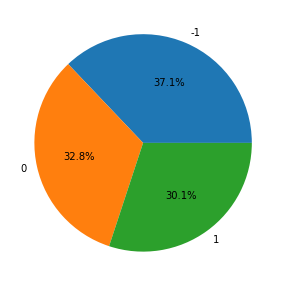

In [38]:
plt.figure(figsize = (5,5))
plt.pie(frequencies, labels=labels, autopct = '%1.1f%%')
plt.show()

Thus, negative comments have the highest representation, but not by much. Overall, the distribution is fairly even. Let's look at the actual scores more closely.  

In [39]:
sentiment = []

for post in posts2: 
    sentiment.append(sia.polarity_scores(post)["compound"])

In [40]:
mean(sentiment)

-0.060534328358208954

Mean is negative, but very close to zero.

In [41]:
timestamp_comm = posts[posts.title!= "Comment"].timestamp

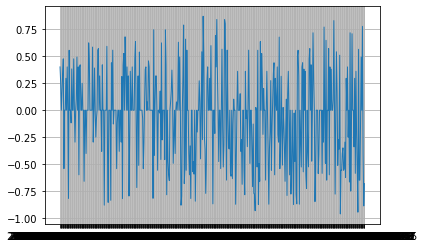

In [42]:
fig, ax = plt.subplots()

ax.plot(timestamp_comm,sentiment,linewidth=1)

plt.grid(visible=True)

plt.show()

Doesn't seem to be any overall trend. Let's add sentiment to the dataframe to make it easier to analyse:

In [43]:
posts_data = posts[posts.title!= "Comment"]

posts_data['sentiment'] = sentiment

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
posts_data.head()

,title,score,id,url,comms_num,created,body,timestamp,sentiment
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45,0.4019
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07,0.2500
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08,0.0000
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13,0.1779
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28,0.3384


In [45]:
posts_pos = posts_data[posts_data.sentiment>0]
posts_neu = posts_data[posts_data.sentiment==0]
posts_neg = posts_data[posts_data.sentiment<0]

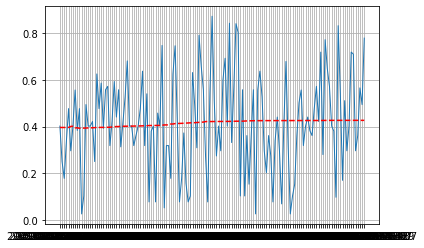

In [46]:
fig, ax = plt.subplots()

ax.plot(posts_pos.timestamp,posts_pos.sentiment,linewidth=1)

plt.grid(visible=True)

#Best-fit line

z = np.polyfit(posts_pos.created, posts_pos.sentiment, 1)

p = np.poly1d(z)

ax.plot(posts_pos.timestamp, p(posts_pos.created),"r--")

plt.show()

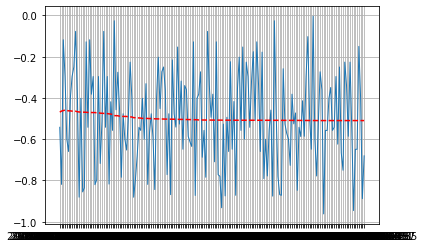

In [47]:
fig, ax = plt.subplots()

ax.plot(posts_neg.timestamp,posts_neg.sentiment,linewidth=1)

plt.grid(visible=True)

#Best-fit line

z = np.polyfit(posts_neg.created, posts_neg.sentiment, 1)

p = np.poly1d(z)

ax.plot(posts_neg.timestamp, p(posts_neg.created),"r--")

plt.show()

Don't seem to be any significant trends here. Seems like positive sentiment slightly increased over time and negative sentiment slightly decreased, but these changes are very small. Would be interesting to see if there are trends on shorter timescales.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0bfa0f990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0d8878cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0bfa0fa50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0c489c510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0c489cc90>],
 'means': []}

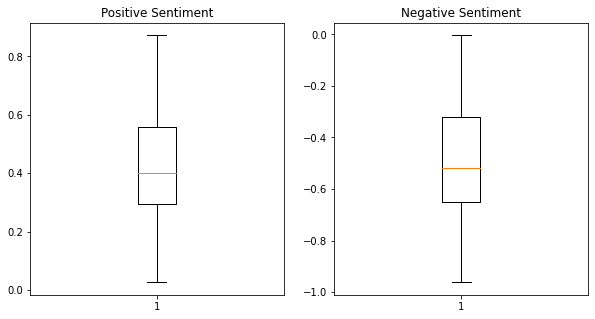

In [48]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_title('Positive Sentiment')
ax[0].boxplot(posts_pos.sentiment)

ax[1].set_title('Negative Sentiment')
ax[1].boxplot(posts_neg.sentiment)

In [49]:
print('Positive sentiment mean: {}'.format(mean(posts_pos.sentiment)), '\nNegative sentiment mean: {}'.format(mean(posts_neg.sentiment))  )

Positive sentiment mean: 0.41440992907801416 
Negative sentiment mean: -0.49897931034482756


The distriubtion is roughly the same for both positive and negative sentiment, with a larger mean for negative sentiment.